In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [3]:
# Preprocess the data
def preprocess_data(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Remove outliers
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    
    return df_cleaned, numeric_cols

# Preprocess the data
df_cleaned, numeric_cols = preprocess_data(info_A1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

In [4]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

# Convert to DataFrame for convenience
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


Clustering with 2 Clusters

In [21]:
models_2_clusters = {
    'KMeans_2': KMeans(n_clusters=2, random_state=42),
    'AgglomerativeClustering_2': AgglomerativeClustering(n_clusters=2),
    'DBSCAN_2': DBSCAN(eps=0.5, min_samples=5),
    'SpectralClustering_2': SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=42),
    'GaussianMixture_2': GaussianMixture(n_components=2, random_state=42)
}

cluster_labels_2 = {}
for model_name, model in models_2_clusters.items():
    cluster_labels_2[model_name] = model.fit_predict(pca_df)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [22]:
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

evaluation_results_2 = {}
for model_name, labels in cluster_labels_2.items():
    silhouette, db_score, ch_score = evaluate_clustering(labels, pca_df)
    evaluation_results_2[model_name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_score,
        'Calinski-Harabasz Index': ch_score
    }

    # Print evaluation results for 3 clusters
for model_name, results in evaluation_results_2.items():
    print(f"{model_name} Evaluation Results for 3 Clusters:")
    print(f"Silhouette Score: {results['Silhouette Score']}")
    print(f"Davies-Bouldin Index: {results['Davies-Bouldin Index']}")
    print(f"Calinski-Harabasz Index: {results['Calinski-Harabasz Index']}\n")

KMeans_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.2946924338123618
Davies-Bouldin Index: 1.2207906191354791
Calinski-Harabasz Index: 218.4155999924134

AgglomerativeClustering_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.27189216291348256
Davies-Bouldin Index: 1.3521654527828706
Calinski-Harabasz Index: 170.37590522055638

DBSCAN_2 Evaluation Results for 3 Clusters:
Silhouette Score: -1
Davies-Bouldin Index: inf
Calinski-Harabasz Index: 0

SpectralClustering_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.0008360672268728327
Davies-Bouldin Index: 24.98516399938698
Calinski-Harabasz Index: 0.5256140734823973

GaussianMixture_2 Evaluation Results for 3 Clusters:
Silhouette Score: 0.21916923163345636
Davies-Bouldin Index: 1.8676190217729518
Calinski-Harabasz Index: 80.89252175518465



Clustering with 3 Clusters

In [23]:
models_3_clusters = {
    'KMeans_3': KMeans(n_clusters=3, random_state=42),
    'AgglomerativeClustering_3': AgglomerativeClustering(n_clusters=3),
    'DBSCAN_3': DBSCAN(eps=0.5, min_samples=5),
    'SpectralClustering_3': SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42),
    'GaussianMixture_3': GaussianMixture(n_components=3, random_state=42)
}

cluster_labels_3 = {}
for model_name, model in models_3_clusters.items():
    cluster_labels_3[model_name] = model.fit_predict(pca_df)

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [24]:
# Evaluate each clustering model for 3 clusters
evaluation_results_3 = {}
for model_name, labels in cluster_labels_3.items():
    silhouette, db_score, ch_score = evaluate_clustering(labels, pca_df)
    evaluation_results_3[model_name] = {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': db_score,
        'Calinski-Harabasz Index': ch_score
    }

# Print evaluation results for 3 clusters
for model_name, results in evaluation_results_3.items():
    print(f"{model_name} Evaluation Results for 3 Clusters:")
    print(f"Silhouette Score: {results['Silhouette Score']}")
    print(f"Davies-Bouldin Index: {results['Davies-Bouldin Index']}")
    print(f"Calinski-Harabasz Index: {results['Calinski-Harabasz Index']}\n")


KMeans_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.31611334064005914
Davies-Bouldin Index: 1.2050463883321818
Calinski-Harabasz Index: 196.051513125812

AgglomerativeClustering_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.2959427396927967
Davies-Bouldin Index: 1.038046387577744
Calinski-Harabasz Index: 170.73336388908768

DBSCAN_3 Evaluation Results for 3 Clusters:
Silhouette Score: -1
Davies-Bouldin Index: inf
Calinski-Harabasz Index: 0

SpectralClustering_3 Evaluation Results for 3 Clusters:
Silhouette Score: -0.01563120557331915
Davies-Bouldin Index: 29.4562283170555
Calinski-Harabasz Index: 0.6724415933962393

GaussianMixture_3 Evaluation Results for 3 Clusters:
Silhouette Score: 0.18182290197240736
Davies-Bouldin Index: 2.149458192924868
Calinski-Harabasz Index: 69.21137969094481



Compare 2 and 3 Clusters

In [25]:
comparison_results = {}

for model_name in models_3_clusters.keys():
    base_name = model_name.replace('_3', '_2')
    comparison_results[model_name] = {
        '2 Clusters': evaluation_results_2[base_name],
        '3 Clusters': evaluation_results_3[model_name]
    }

    # Print comparison results
for model_name, results in comparison_results.items():
    print(f"Comparison Results for {model_name}:")
    print(f"2 Clusters - Silhouette Score: {results['2 Clusters']['Silhouette Score']}")
    print(f"2 Clusters - Davies-Bouldin Index: {results['2 Clusters']['Davies-Bouldin Index']}")
    print(f"2 Clusters - Calinski-Harabasz Index: {results['2 Clusters']['Calinski-Harabasz Index']}")
    print(f"3 Clusters - Silhouette Score: {results['3 Clusters']['Silhouette Score']}")
    print(f"3 Clusters - Davies-Bouldin Index: {results['3 Clusters']['Davies-Bouldin Index']}")


    print(f"3 Clusters - Calinski-Harabasz Index: {results['3 Clusters']['Calinski-Harabasz Index']}\n")

Comparison Results for KMeans_3:
2 Clusters - Silhouette Score: 0.2946924338123618
2 Clusters - Davies-Bouldin Index: 1.2207906191354791
2 Clusters - Calinski-Harabasz Index: 218.4155999924134
3 Clusters - Silhouette Score: 0.31611334064005914
3 Clusters - Davies-Bouldin Index: 1.2050463883321818
3 Clusters - Calinski-Harabasz Index: 196.051513125812

Comparison Results for AgglomerativeClustering_3:
2 Clusters - Silhouette Score: 0.27189216291348256
2 Clusters - Davies-Bouldin Index: 1.3521654527828706
2 Clusters - Calinski-Harabasz Index: 170.37590522055638
3 Clusters - Silhouette Score: 0.2959427396927967
3 Clusters - Davies-Bouldin Index: 1.038046387577744
3 Clusters - Calinski-Harabasz Index: 170.73336388908768

Comparison Results for DBSCAN_3:
2 Clusters - Silhouette Score: -1
2 Clusters - Davies-Bouldin Index: inf
2 Clusters - Calinski-Harabasz Index: 0
3 Clusters - Silhouette Score: -1
3 Clusters - Davies-Bouldin Index: inf
3 Clusters - Calinski-Harabasz Index: 0

Comparison Re

In [26]:
from tabulate import tabulate

comparison_results = {}

for model_name in models_3_clusters.keys():
    base_name = model_name.replace('_3', '_2')
    comparison_results[model_name] = {
        '2 Clusters': evaluation_results_2[base_name],
        '3 Clusters': evaluation_results_3[model_name]
    }

# Prepare data for tabulate
table_data = []
headers = ["Model", "Metric", "2 Clusters", "3 Clusters"]

for model_name, results in comparison_results.items():
    table_data.append([model_name, "Silhouette Score", results['2 Clusters']['Silhouette Score'], results['3 Clusters']['Silhouette Score']])
    table_data.append([model_name, "Davies-Bouldin Index", results['2 Clusters']['Davies-Bouldin Index'], results['3 Clusters']['Davies-Bouldin Index']])
    table_data.append([model_name, "Calinski-Harabasz Index", results['2 Clusters']['Calinski-Harabasz Index'], results['3 Clusters']['Calinski-Harabasz Index']])

# Print comparison results using tabulate
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------------+-------------------------+---------------+--------------+
| Model                     | Metric                  |    2 Clusters |   3 Clusters |
+===========================+=========================+===============+==============+
| KMeans_3                  | Silhouette Score        |   0.294692    |    0.316113  |
+---------------------------+-------------------------+---------------+--------------+
| KMeans_3                  | Davies-Bouldin Index    |   1.22079     |    1.20505   |
+---------------------------+-------------------------+---------------+--------------+
| KMeans_3                  | Calinski-Harabasz Index | 218.416       |  196.052     |
+---------------------------+-------------------------+---------------+--------------+
| AgglomerativeClustering_3 | Silhouette Score        |   0.271892    |    0.295943  |
+---------------------------+-------------------------+---------------+--------------+
| AgglomerativeClustering_3 | Davies-Bouldi

BayesCV

In [27]:
from skopt import BayesSearchCV

# Define the parameter search space for KMeans
param_space_kmeans = {
    'n_clusters': (2, 10),
    'init': ['k-means++', 'random'],
    'n_init': (10, 30),
    'max_iter': (300, 1000)
}

# Custom scorer for KMeans
def kmeans_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for KMeans
bayes_search_kmeans = BayesSearchCV(
    estimator=KMeans(random_state=42),
    search_spaces=param_space_kmeans,
    n_iter=32,
    scoring=kmeans_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_kmeans.fit(pca_df)
best_kmeans_params = bayes_search_kmeans.best_params_
best_kmeans_score = bayes_search_kmeans.best_score_

In [28]:
# Define the parameter search space for Hierarchical Clustering (HCA)
param_space_hca = {
    'n_clusters': (2, 10),
    'linkage': ['ward', 'complete', 'average', 'single'],
}

# Custom scorer for HCA
def hca_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for HCA
bayes_search_hca = BayesSearchCV(
    estimator=AgglomerativeClustering(),
    search_spaces=param_space_hca,
    n_iter=32,
    scoring=hca_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_hca.fit(pca_df)
best_hca_params = bayes_search_hca.best_params_
best_hca_score = bayes_search_hca.best_score_


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('complete'), np.int64(2)] before, using random point ['complete', np.int64(4)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('complete'), np.int64(2)] before, using random point ['complete', np.int64(4)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('complete'), np.int64(2)] before, using random point ['complete', np.int64(4)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\

In [29]:
# Define the parameter search space for DBSCAN
param_space_dbscan = {
    'eps': (0.1, 1.0, 'uniform'),
    'min_samples': (3, 20),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Custom scorer for DBSCAN
def dbscan_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(X[labels != -1], labels[labels != -1])
    else:
        score = -1  # No valid clusters
    return score

# Bayesian optimization for DBSCAN
bayes_search_dbscan = BayesSearchCV(
    estimator=DBSCAN(),
    search_spaces=param_space_dbscan,
    n_iter=32,
    scoring=dbscan_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_dbscan.fit(pca_df)
best_dbscan_params = bayes_search_dbscan.best_params_
best_dbscan_score = bayes_search_dbscan.best_score_

In [30]:
# Define the parameter search space for Spectral Clustering
param_space_spectral = {
    'n_clusters': (2, 10),
    'affinity': ['nearest_neighbors', 'rbf']
}

# Custom scorer for Spectral Clustering
def spectral_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for Spectral Clustering
bayes_search_spectral = BayesSearchCV(
    estimator=SpectralClustering(assign_labels='discretize', random_state=42),
    search_spaces=param_space_spectral,
    n_iter=32,
    scoring=spectral_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_spectral.fit(pca_df)
best_spectral_params = bayes_search_spectral.best_params_
best_spectral_score = bayes_search_spectral.best_score_

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('nearest_neighbors'), np.int64(3)] before, using random point ['rbf', np.int64(7)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('nearest_neighbors'), np.int64(3)] before, using random point ['rbf', np.int64(2)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('nearest_neighbors'), np.int64(3)] before, using random point ['nearest_neighbors', np.int64(8)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\en

In [31]:
# Define the parameter search space for Gaussian Mixture
param_space_gmm = {
    'n_components': (2, 10),
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_init': (1, 10)
}

# Custom scorer for Gaussian Mixture
def gmm_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for Gaussian Mixture
bayes_search_gmm = BayesSearchCV(
    estimator=GaussianMixture(random_state=42),
    search_spaces=param_space_gmm,
    n_iter=32,
    scoring=gmm_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)
bayes_search_gmm.fit(pca_df)
best_gmm_params = bayes_search_gmm.best_params_
best_gmm_score = bayes_search_gmm.best_score_

c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('tied'), np.int64(2), np.int64(1)] before, using random point ['full', np.int64(5), np.int64(7)]
  warnings.warn(


In [32]:
# Print best parameters and scores for all models
print(f'Best KMeans parameters: {best_kmeans_params}')
print(f'Best KMeans silhouette score: {best_kmeans_score}')
print(f'Best HCA parameters: {best_hca_params}')
print(f'Best HCA silhouette score: {best_hca_score}')
print(f'Best DBSCAN parameters: {best_dbscan_params}')
print(f'Best DBSCAN silhouette score: {best_dbscan_score}')
print(f'Best Spectral Clustering parameters: {best_spectral_params}')
print(f'Best Spectral Clustering silhouette score: {best_spectral_score}')
print(f'Best Gaussian Mixture parameters: {best_gmm_params}')
print(f'Best Gaussian Mixture silhouette score: {best_gmm_score}')

Best KMeans parameters: OrderedDict({'init': 'random', 'max_iter': 353, 'n_clusters': 2, 'n_init': 30})
Best KMeans silhouette score: 0.4589316830142593
Best HCA parameters: OrderedDict({'linkage': 'average', 'n_clusters': 2})
Best HCA silhouette score: 0.5553706438528261
Best DBSCAN parameters: OrderedDict({'algorithm': 'ball_tree', 'eps': 0.7549531688595925, 'metric': 'chebyshev', 'min_samples': 8})
Best DBSCAN silhouette score: -1.0
Best Spectral Clustering parameters: OrderedDict({'affinity': 'nearest_neighbors', 'n_clusters': 3})
Best Spectral Clustering silhouette score: 0.33559203506591834
Best Gaussian Mixture parameters: OrderedDict({'covariance_type': 'spherical', 'n_components': 2, 'n_init': 1})
Best Gaussian Mixture silhouette score: 0.45896633032743733


In [33]:
# Evaluate best KMeans parameters
kmeans_best = KMeans(**best_kmeans_params, random_state=42)
kmeans_best_labels = kmeans_best.fit_predict(pca_df)
kmeans_best_silhouette, kmeans_best_db_score, kmeans_best_ch_score = evaluate_clustering(kmeans_best_labels, pca_df)

# Evaluate best HCA parameters
hca_best = AgglomerativeClustering(**best_hca_params)
hca_best_labels = hca_best.fit_predict(pca_df)
hca_best_silhouette, hca_best_db_score, hca_best_ch_score = evaluate_clustering(hca_best_labels, pca_df)

# Evaluate best DBSCAN parameters
dbscan_best = DBSCAN(**best_dbscan_params)
dbscan_best_labels = dbscan_best.fit_predict(pca_df)
dbscan_best_silhouette, dbscan_best_db_score, dbscan_best_ch_score = evaluate_clustering(dbscan_best_labels, pca_df)

# Evaluate best Spectral Clustering parameters
spectral_best = SpectralClustering(**best_spectral_params, assign_labels='discretize', random_state=42)
spectral_best_labels = spectral_best.fit_predict(pca_df)
spectral_best_silhouette, spectral_best_db_score, spectral_best_ch_score = evaluate_clustering(spectral_best_labels, pca_df)

# Evaluate best Gaussian Mixture parameters
gmm_best = GaussianMixture(**best_gmm_params, random_state=42)
gmm_best_labels = gmm_best.fit_predict(pca_df)
gmm_best_silhouette, gmm_best_db_score, gmm_best_ch_score = evaluate_clustering(gmm_best_labels, pca_df)

# Store results
best_evaluation_results = {
    'KMeans_Best': {
        'Silhouette Score': kmeans_best_silhouette,
        'Davies-Bouldin Index': kmeans_best_db_score,
        'Calinski-Harabasz Index': kmeans_best_ch_score
    },
    'HCA_Best': {
        'Silhouette Score': hca_best_silhouette,
        'Davies-Bouldin Index': hca_best_db_score,
        'Calinski-Harabasz Index': hca_best_ch_score
    },
    'DBSCAN_Best': {
        'Silhouette Score': dbscan_best_silhouette,
        'Davies-Bouldin Index': dbscan_best_db_score,
        'Calinski-Harabasz Index': dbscan_best_ch_score
    },
    'SpectralClustering_Best': {
        'Silhouette Score': spectral_best_silhouette,
        'Davies-Bouldin Index': spectral_best_db_score,
        'Calinski-Harabasz Index': spectral_best_ch_score
    },
    'GaussianMixture_Best': {
        'Silhouette Score': gmm_best_silhouette,
        'Davies-Bouldin Index': gmm_best_db_score,
        'Calinski-Harabasz Index': gmm_best_ch_score
    }
}


+-------------------------+---------------------------+-------------------------------+----------------------------------+---------------------------+-------------------------------+----------------------------------+----------------------------+--------------------------------+-----------------------------------+
| Model                   |   Silhouette (2 Clusters) |   Davies-Bouldin (2 Clusters) |   Calinski-Harabasz (2 Clusters) |   Silhouette (3 Clusters) |   Davies-Bouldin (3 Clusters) |   Calinski-Harabasz (3 Clusters) |   Silhouette (Best Params) |   Davies-Bouldin (Best Params) |   Calinski-Harabasz (Best Params) |
+=========================+===========================+===============================+==================================+===========================+===============================+==================================+============================+================================+===================================+
| KMeans                  |               0.294692  

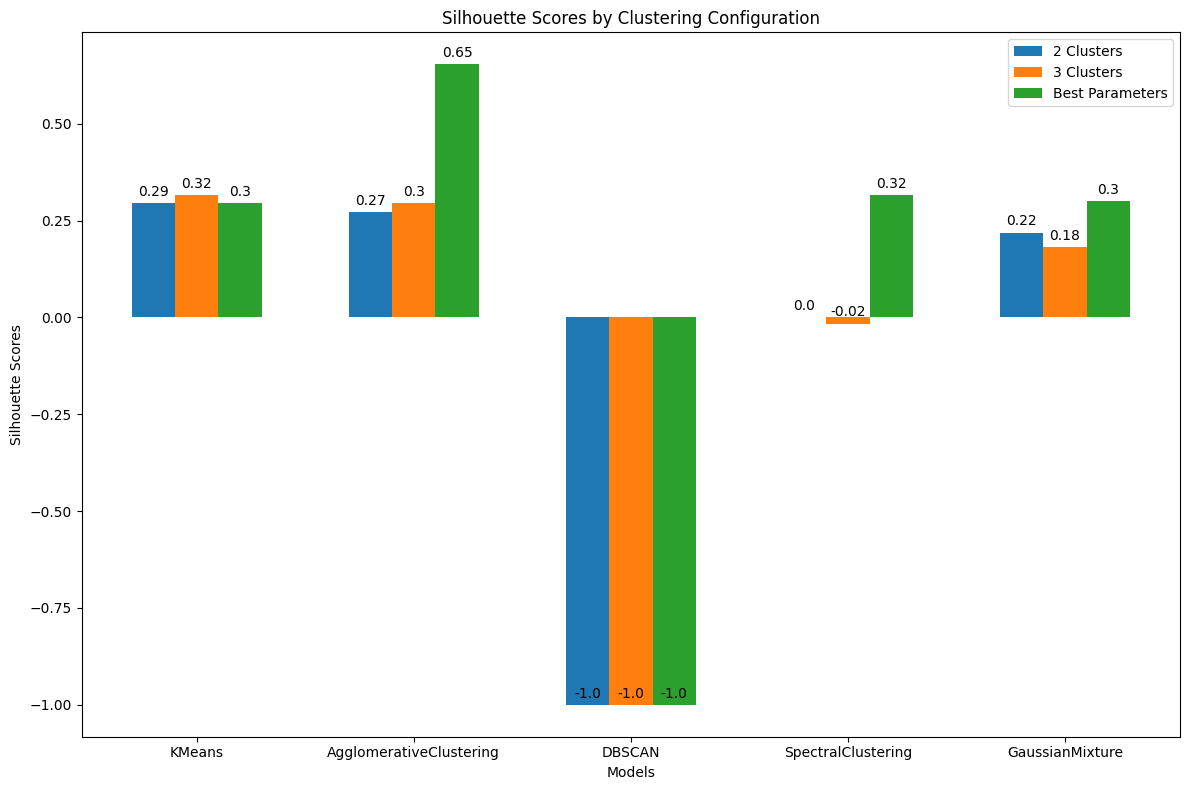

In [34]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Comparison results for 2, 3 clusters, and best parameters
comparison_results = {
    'KMeans': {
        '2 Clusters': evaluation_results_2['KMeans_2'],
        '3 Clusters': evaluation_results_3['KMeans_3'],
        'Best Parameters': best_evaluation_results['KMeans_Best']
    },
    'AgglomerativeClustering': {
        '2 Clusters': evaluation_results_2['AgglomerativeClustering_2'],
        '3 Clusters': evaluation_results_3['AgglomerativeClustering_3'],
        'Best Parameters': best_evaluation_results['HCA_Best']
    },
    'DBSCAN': {
        '2 Clusters': evaluation_results_2['DBSCAN_2'],
        '3 Clusters': evaluation_results_3['DBSCAN_3'],
        'Best Parameters': best_evaluation_results['DBSCAN_Best']
    },
    'SpectralClustering': {
        '2 Clusters': evaluation_results_2['SpectralClustering_2'],
        '3 Clusters': evaluation_results_3['SpectralClustering_3'],
        'Best Parameters': best_evaluation_results['SpectralClustering_Best']
    },
    'GaussianMixture': {
        '2 Clusters': evaluation_results_2['GaussianMixture_2'],
        '3 Clusters': evaluation_results_3['GaussianMixture_3'],
        'Best Parameters': best_evaluation_results['GaussianMixture_Best']
    }
}

# Format the comparison results for better presentation
formatted_comparison_results = []

for model_name, results in comparison_results.items():
    formatted_comparison_results.append([
        model_name,
        results['2 Clusters']['Silhouette Score'], results['2 Clusters']['Davies-Bouldin Index'], results['2 Clusters']['Calinski-Harabasz Index'],
        results['3 Clusters']['Silhouette Score'], results['3 Clusters']['Davies-Bouldin Index'], results['3 Clusters']['Calinski-Harabasz Index'],
        results['Best Parameters']['Silhouette Score'], results['Best Parameters']['Davies-Bouldin Index'], results['Best Parameters']['Calinski-Harabasz Index']
    ])

# Define table headers
headers = ["Model", 
           "Silhouette (2 Clusters)", "Davies-Bouldin (2 Clusters)", "Calinski-Harabasz (2 Clusters)",
           "Silhouette (3 Clusters)", "Davies-Bouldin (3 Clusters)", "Calinski-Harabasz (3 Clusters)",
           "Silhouette (Best Params)", "Davies-Bouldin (Best Params)", "Calinski-Harabasz (Best Params)"]

# Print comparison results as a table
print(tabulate(formatted_comparison_results, headers=headers, tablefmt="grid"))

# Prepare data for bar chart
models = list(comparison_results.keys())
silhouette_2 = [comparison_results[model]['2 Clusters']['Silhouette Score'] for model in models]
silhouette_3 = [comparison_results[model]['3 Clusters']['Silhouette Score'] for model in models]
silhouette_best = [comparison_results[model]['Best Parameters']['Silhouette Score'] for model in models]

x = np.arange(len(models))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, silhouette_2, width, label='2 Clusters')
rects2 = ax.bar(x, silhouette_3, width, label='3 Clusters')
rects3 = ax.bar(x + width, silhouette_best, width, label='Best Parameters')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Silhouette Scores')
ax.set_title('Silhouette Scores by Clustering Configuration')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels to bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()


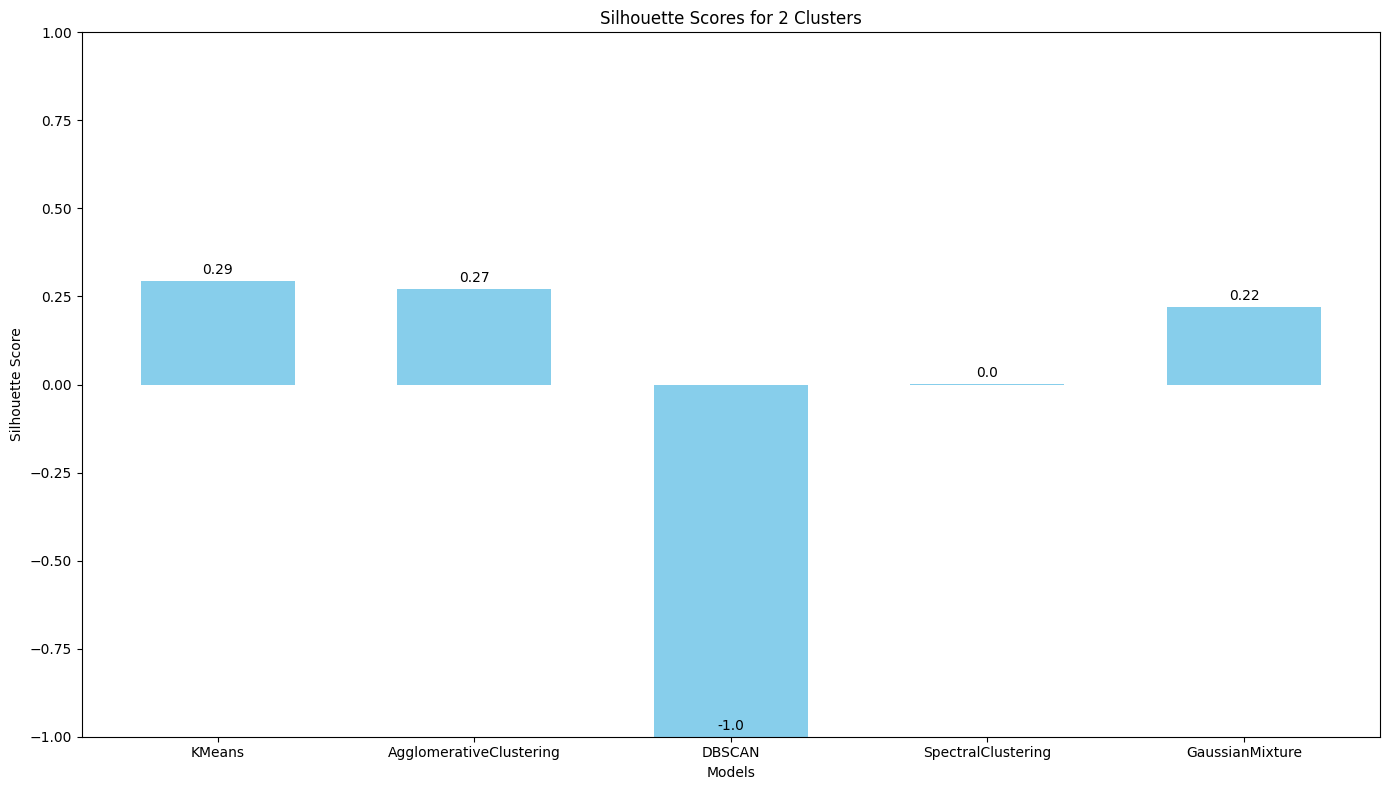

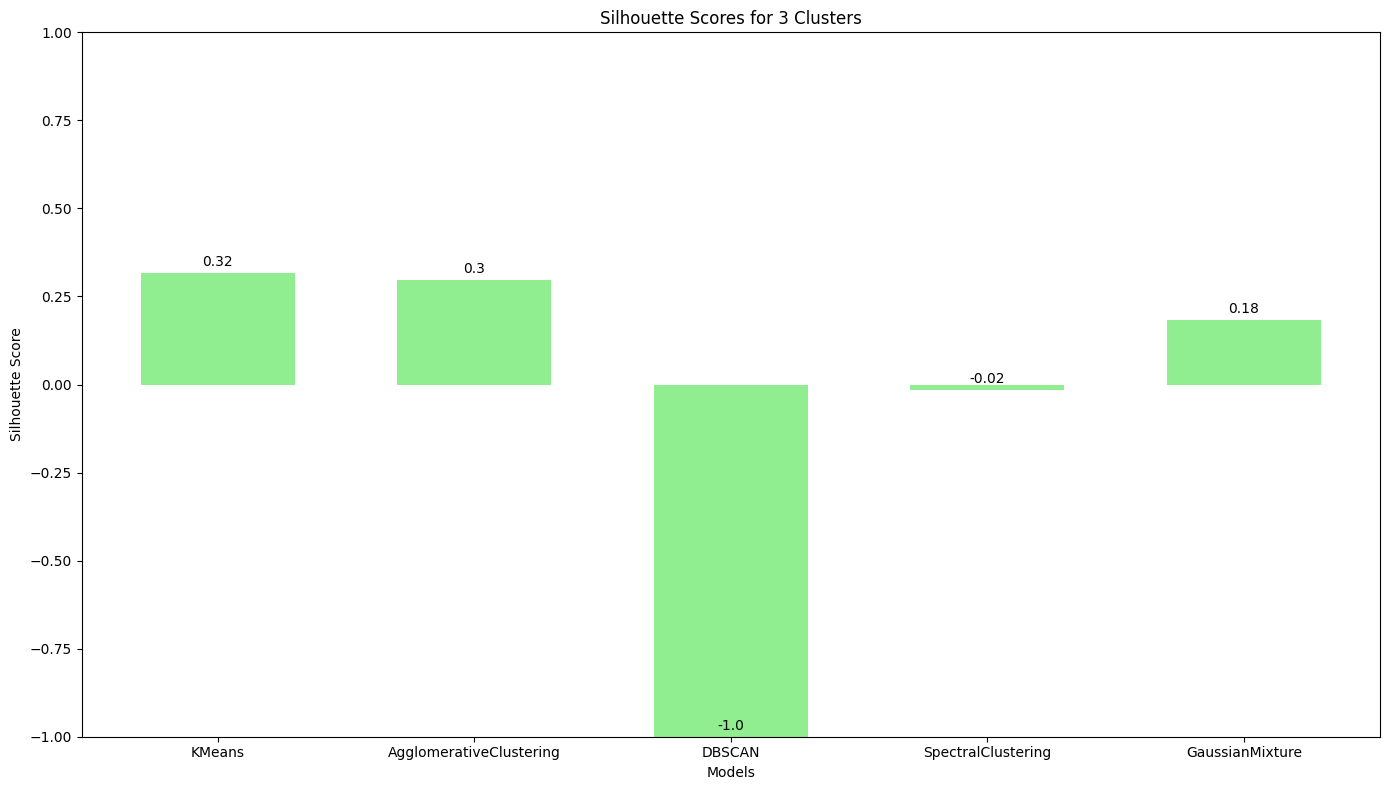

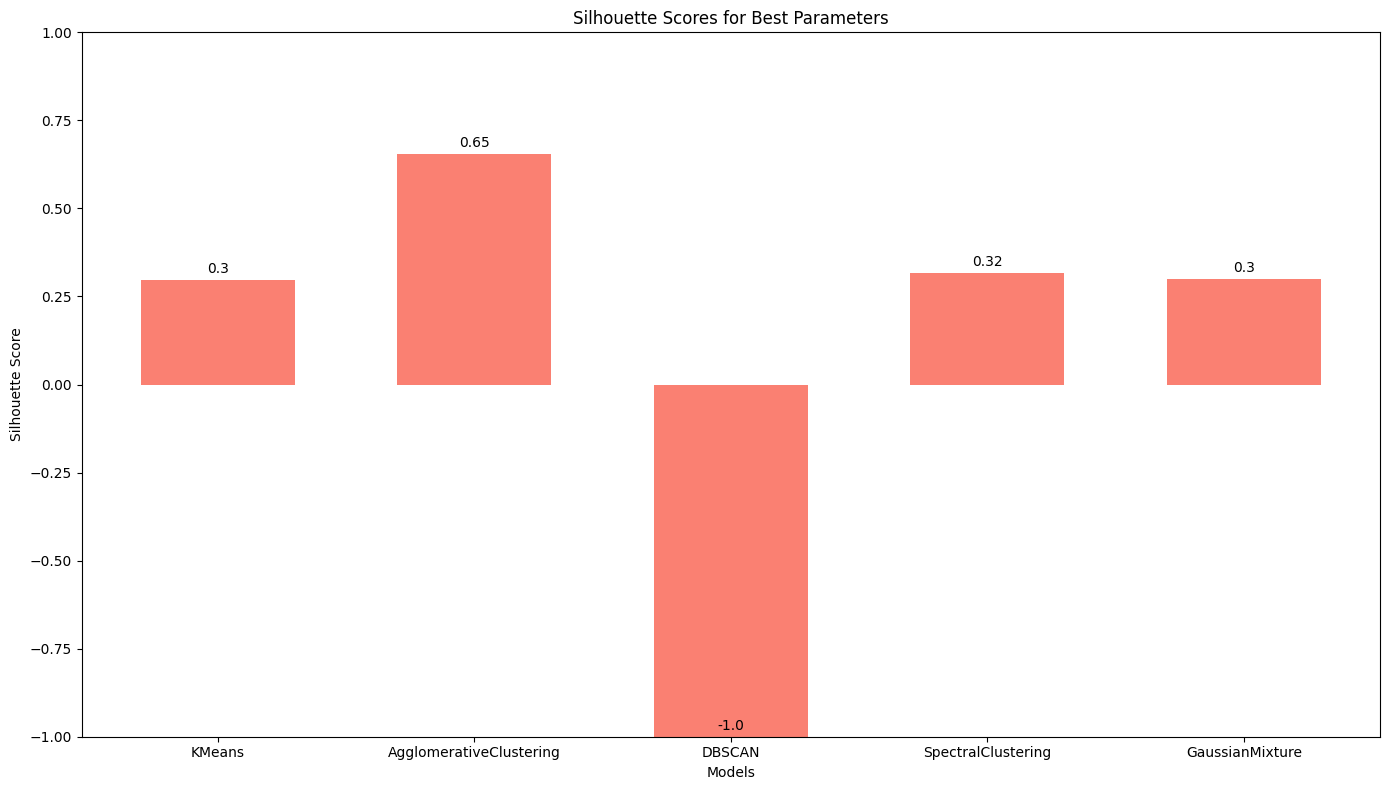

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for bar chart
models = ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']

# Silhouette Scores for 2 Clusters, 3 Clusters, and Best Parameters
silhouette_2 = [evaluation_results_2['KMeans_2']['Silhouette Score'],
                evaluation_results_2['AgglomerativeClustering_2']['Silhouette Score'],
                evaluation_results_2['DBSCAN_2']['Silhouette Score'],
                evaluation_results_2['SpectralClustering_2']['Silhouette Score'],
                evaluation_results_2['GaussianMixture_2']['Silhouette Score']]

silhouette_3 = [evaluation_results_3['KMeans_3']['Silhouette Score'],
                evaluation_results_3['AgglomerativeClustering_3']['Silhouette Score'],
                evaluation_results_3['DBSCAN_3']['Silhouette Score'],
                evaluation_results_3['SpectralClustering_3']['Silhouette Score'],
                evaluation_results_3['GaussianMixture_3']['Silhouette Score']]

silhouette_best = [best_evaluation_results['KMeans_Best']['Silhouette Score'],
                   best_evaluation_results['HCA_Best']['Silhouette Score'],
                   best_evaluation_results['DBSCAN_Best']['Silhouette Score'],
                   best_evaluation_results['SpectralClustering_Best']['Silhouette Score'],
                   best_evaluation_results['GaussianMixture_Best']['Silhouette Score']]

# Plotting bar charts for each scenario
x = np.arange(len(models))  # Label locations
width = 0.6  # Width of the bars

def plot_barchart(data, title, ylabel, color, y_label_pos, filename):
    fig, ax = plt.subplots(figsize=(14, 8))
    rects = ax.bar(x, data, width, color=color)

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_xlabel('Models')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(y_label_pos)
    
    # Function to add labels to bars
    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(rects)

    fig.tight_layout()
    plt.show()
    fig.savefig(filename)

plot_barchart(silhouette_2, 'Silhouette Scores for 2 Clusters', 'Silhouette Score', 'skyblue', [-1, 1], 'silhouette_2_clusters.png')
plot_barchart(silhouette_3, 'Silhouette Scores for 3 Clusters', 'Silhouette Score', 'lightgreen', [-1, 1], 'silhouette_3_clusters.png')
plot_barchart(silhouette_best, 'Silhouette Scores for Best Parameters', 'Silhouette Score', 'salmon', [-1, 1], 'silhouette_best_parameters.png')


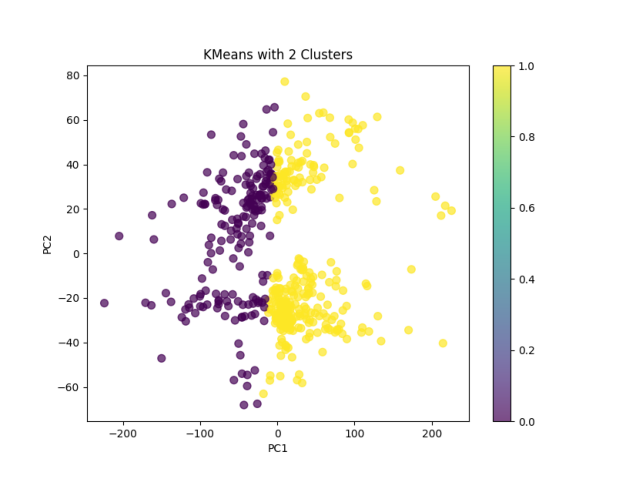

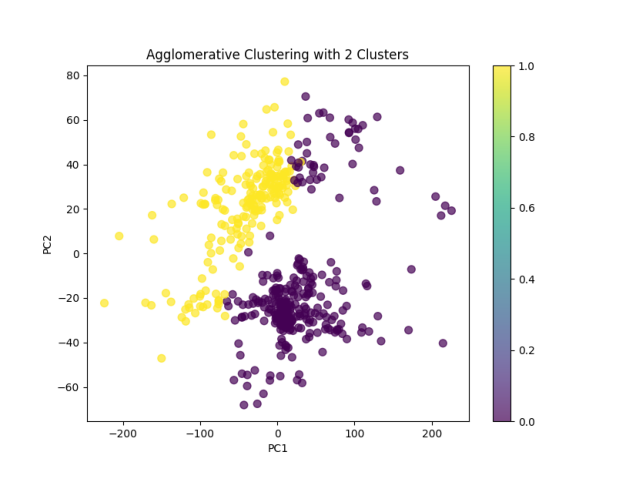

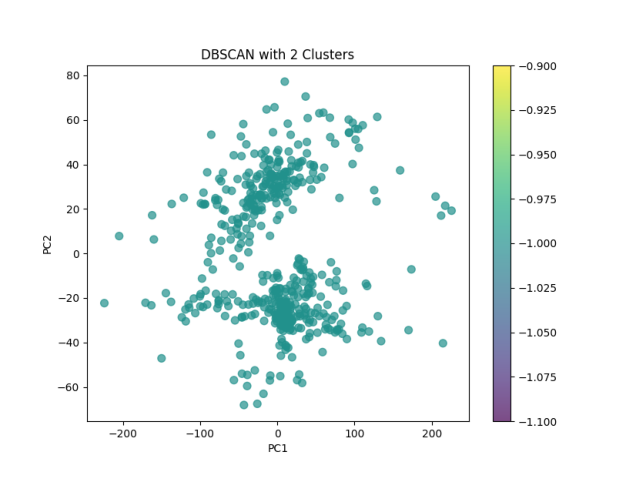

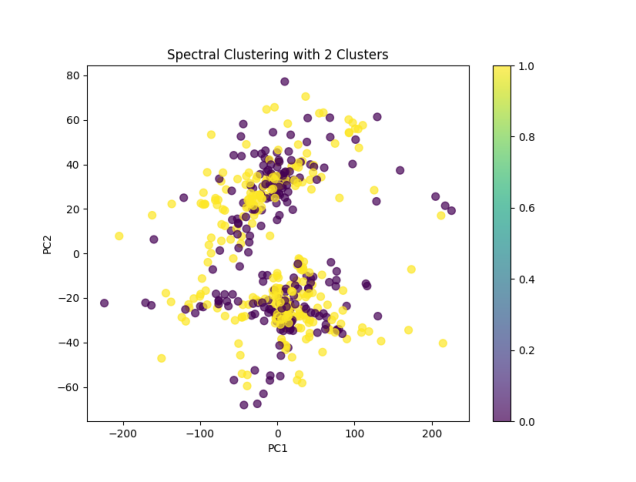

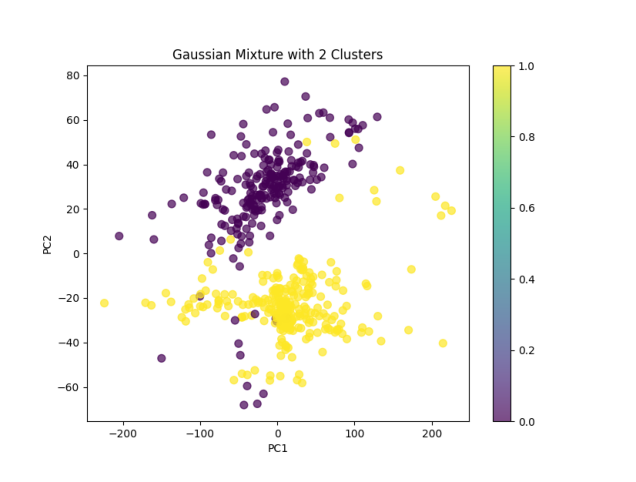

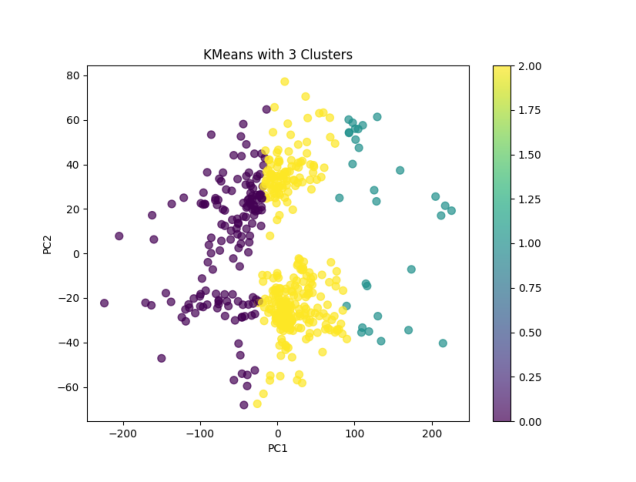

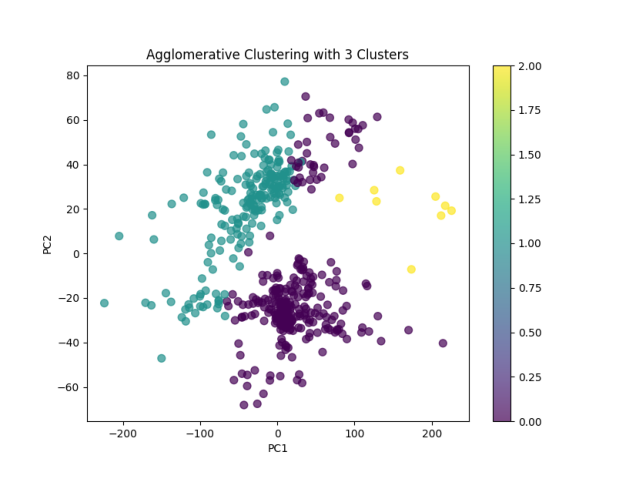

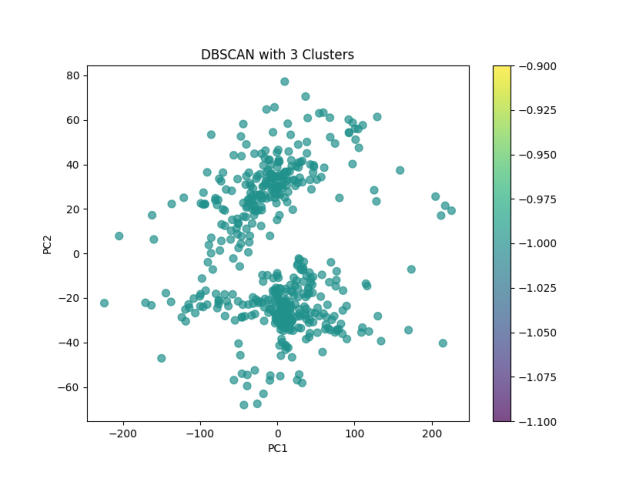

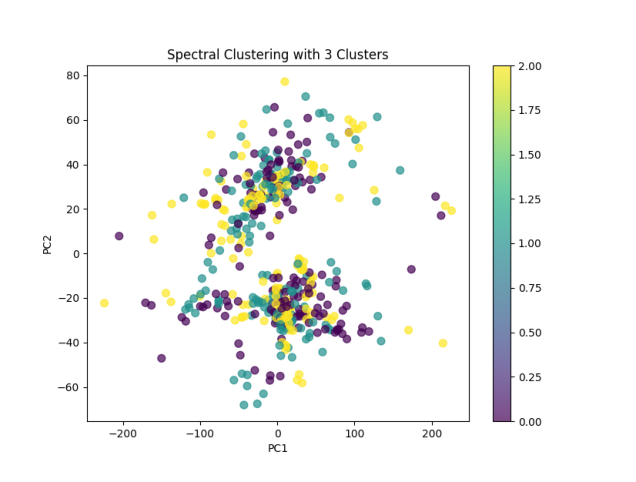

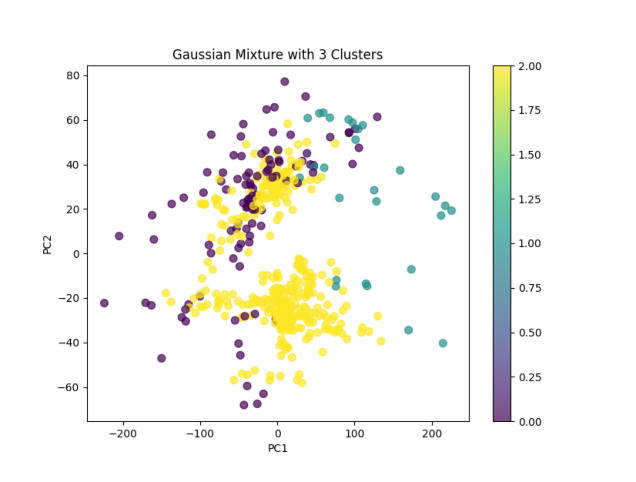

In [36]:
import matplotlib.pyplot as plt

# Assuming you have the cluster_labels and cluster_labels_3 defined as before
# Example:
# cluster_labels = {'KMeans_2': ..., 'AgglomerativeClustering_2': ..., 'DBSCAN_2': ..., 'SpectralClustering_2': ..., 'GaussianMixture_2': ...}
# cluster_labels_3 = {'KMeans_3': ..., 'AgglomerativeClustering_3': ..., 'DBSCAN_3': ..., 'SpectralClustering_3': ..., 'GaussianMixture_3': ...}

# Function to plot clustering results
def plot_clusters(data, labels, title, filename):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.colorbar()
    plt.savefig(filename)
    plt.close()

# Define titles for the plots
titles = {
    'KMeans_2': 'KMeans with 2 Clusters',
    'AgglomerativeClustering_2': 'Agglomerative Clustering with 2 Clusters',
    'DBSCAN_2': 'DBSCAN with 2 Clusters',
    'SpectralClustering_2': 'Spectral Clustering with 2 Clusters',
    'GaussianMixture_2': 'Gaussian Mixture with 2 Clusters',
    'KMeans_3': 'KMeans with 3 Clusters',
    'AgglomerativeClustering_3': 'Agglomerative Clustering with 3 Clusters',
    'DBSCAN_3': 'DBSCAN with 3 Clusters',
    'SpectralClustering_3': 'Spectral Clustering with 3 Clusters',
    'GaussianMixture_3': 'Gaussian Mixture with 3 Clusters'
}

# Plot clusters for 2 clusters
for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']:
    plot_clusters(pca_data, cluster_labels_2[f'{model_name}_2'], titles[f'{model_name}_2'], f'{model_name}_2_clusters.png')

# Plot clusters for 3 clusters
for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']:
    plot_clusters(pca_data, cluster_labels_3[f'{model_name}_3'], titles[f'{model_name}_3'], f'{model_name}_3_clusters.png')

# Function to display plots
def display_plots(filenames):
    for filename in filenames:
        img = plt.imread(filename)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Filenames for the plots
filenames_2_clusters = [f'{model_name}_2_clusters.png' for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']]
filenames_3_clusters = [f'{model_name}_3_clusters.png' for model_name in ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'SpectralClustering', 'GaussianMixture']]

# Display plots for 2 clusters
display_plots(filenames_2_clusters)

# Display plots for 3 clusters
display_plots(filenames_3_clusters)


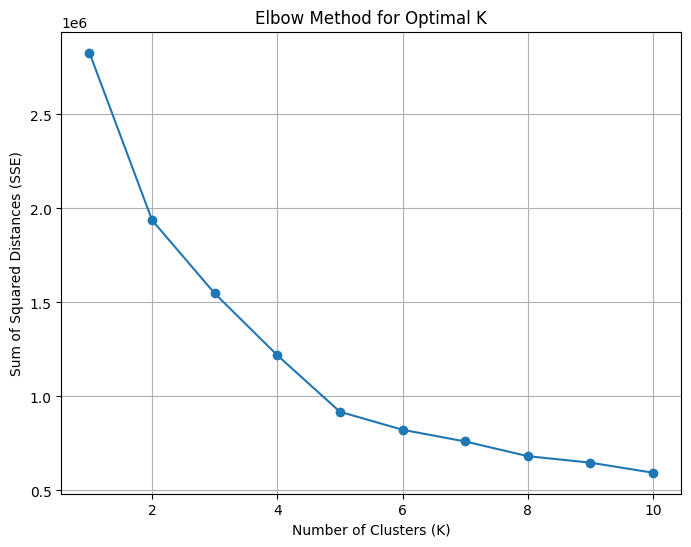

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a function to calculate the sum of squared distances for different values of K
def calculate_elbow(X, max_k=10):
    sse = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    return sse

# Use the PCA-reduced data for the elbow method
pca_data = pca_df[[f'PC{i+1}' for i in range(10)]]

# Calculate SSE for different values of K
sse = calculate_elbow(pca_data, max_k=10)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()


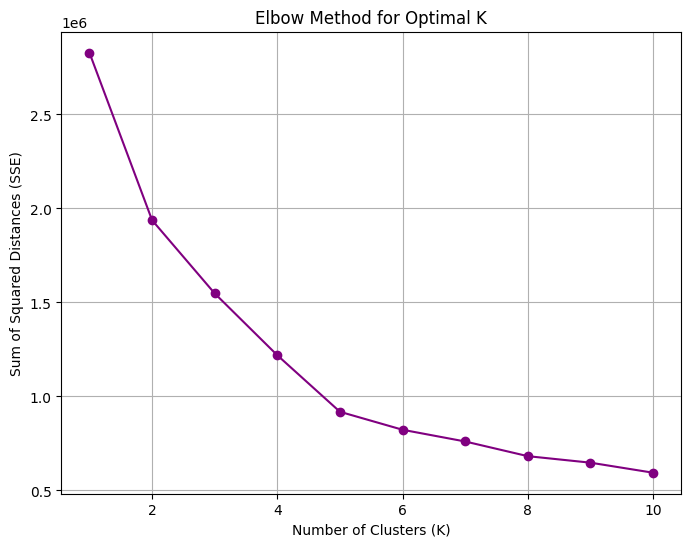

In [11]:
# Plot the elbow curve with a different color
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', color='purple')  # Change color to red
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()

The elbow plot helps to identify the optimal number of clusters (K) by showing the sum of squared distances (SSE) for different values of K. The idea is to choose the K value at the "elbow" point, where the rate of decrease in SSE starts to slow down.

From the provided elbow plot, we can observe the following:

Rapid Decrease in SSE: There is a significant decrease in SSE from K=1 to K=3, indicating that adding clusters reduces the SSE substantially.

Slowing Rate of Decrease: After K=3, the rate of decrease in SSE starts to slow down. This suggests that the additional clusters beyond K=3 do not significantly reduce the SSE.

Optimal K: The "elbow" point is generally considered where the plot starts to bend or flatten out. Based on the plot, the elbow appears to be around K=3 or K=4.

Conclusion:
Optimal Number of Clusters: K=3 or K=4 seems to be the optimal number of clusters for your data. This choice balances between having a low SSE and avoiding overly complex models with too many clusters.
Recommendation: You can experiment with K=3 and K=4 to see which provides better clustering results based on other criteria, such as silhouette scores or interpretability of the clusters.